In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [50]:
sales = pd.read_csv('supermarket_sales - Sheet1.csv')

In [51]:
sales.shape

(1000, 17)

In [52]:
sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [53]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

We can see that the date datatype is an object which needs to be changed to datetime


In [54]:
sales['Date'] = pd.to_datetime(sales['Date'], format='mixed', dayfirst=True)

In [55]:
sales['Date'].dtype

dtype('<M8[ns]')

In [56]:
sales['day'] = (sales['Date']).dt.day
sales['month'] = (sales['Date']).dt.month
sales['year'] = (sales['Date']).dt.year

In [57]:
sales['Time'] = pd.to_datetime(sales['Time'])

Similarly we also changed the data type of the Time column

In [58]:
 sales['Hour'] = (sales['Time']).dt.hour 

# 1. Number of unique hours of sales

In [59]:
sales['Hour'].nunique()

11

In [60]:
sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

# 2. Let's find the number of unique values in columns with object datatype

In [61]:
category = [cname for cname in sales.columns if sales[cname].dtype == 'object']

In [62]:
category

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [63]:
print("# unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(sales['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(sales['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(sales['Product line'].unique().tolist())))
print("# unique values in payment: {0}".format(len(sales['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in payment: 3


In [64]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 06:25:55.200000,2024-03-30 15:24:41.880000,307.58738,4.761905,15.379369,6.97270,15.247000,2.002000,2019.0,14.910000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2024-03-30 10:00:00,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,2024-03-30 12:43:00,118.49750,4.761905,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,2024-03-30 15:19:00,241.76000,4.761905,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,2024-03-30 18:15:00,448.90500,4.761905,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-10-01 00:00:00,2024-03-30 20:59:00,993.00000,4.761905,49.650000,10.00000,31.000000,10.000000,2019.0,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,0.000000,11.708825,1.71858,8.703663,0.872214,0.0,3.186857


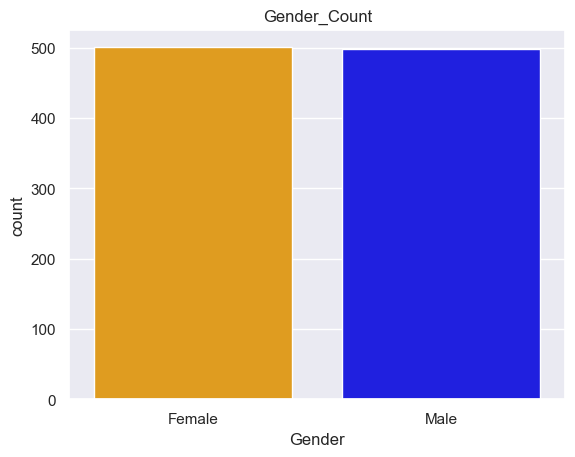

In [65]:
sns.set(style = "darkgrid")
genderCount = sns.countplot(x = "Gender", hue = 'Gender', data = sales,palette={"Male": "blue", "Female": "orange"}).set_title("Gender_Count")

Text(0.5, 1.0, 'Ratings by Branch')

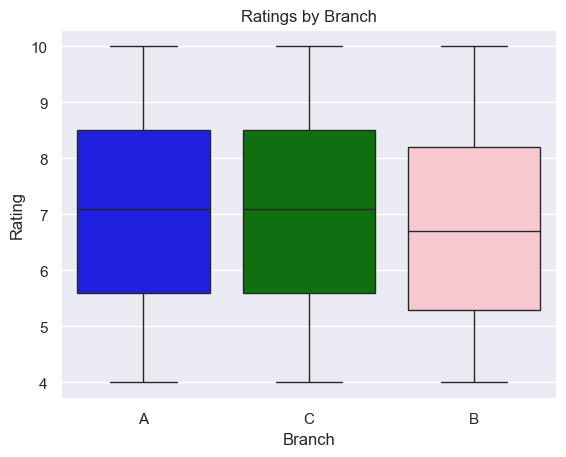

In [66]:
sns.boxplot(x="Branch", y = "Rating", data = sales, hue = "Branch", palette= {"A": "blue", "B": "pink", "C": "green"}).set_title("Ratings by Branch")

Branch B has the lowest rating among all

# 3. Sales by Hours

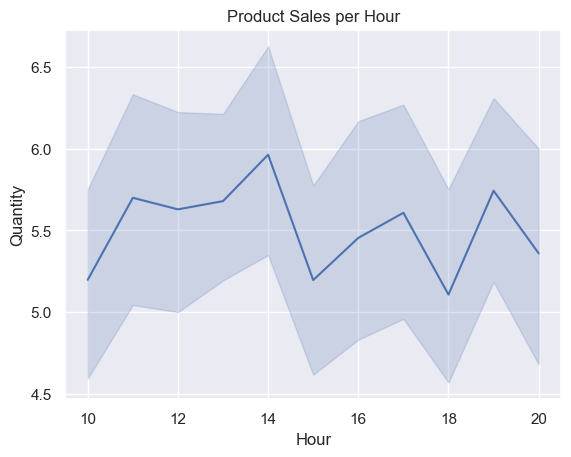

In [67]:
sales_hours  = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

#  Branch's sales quantity by the hour in a monthly fashion

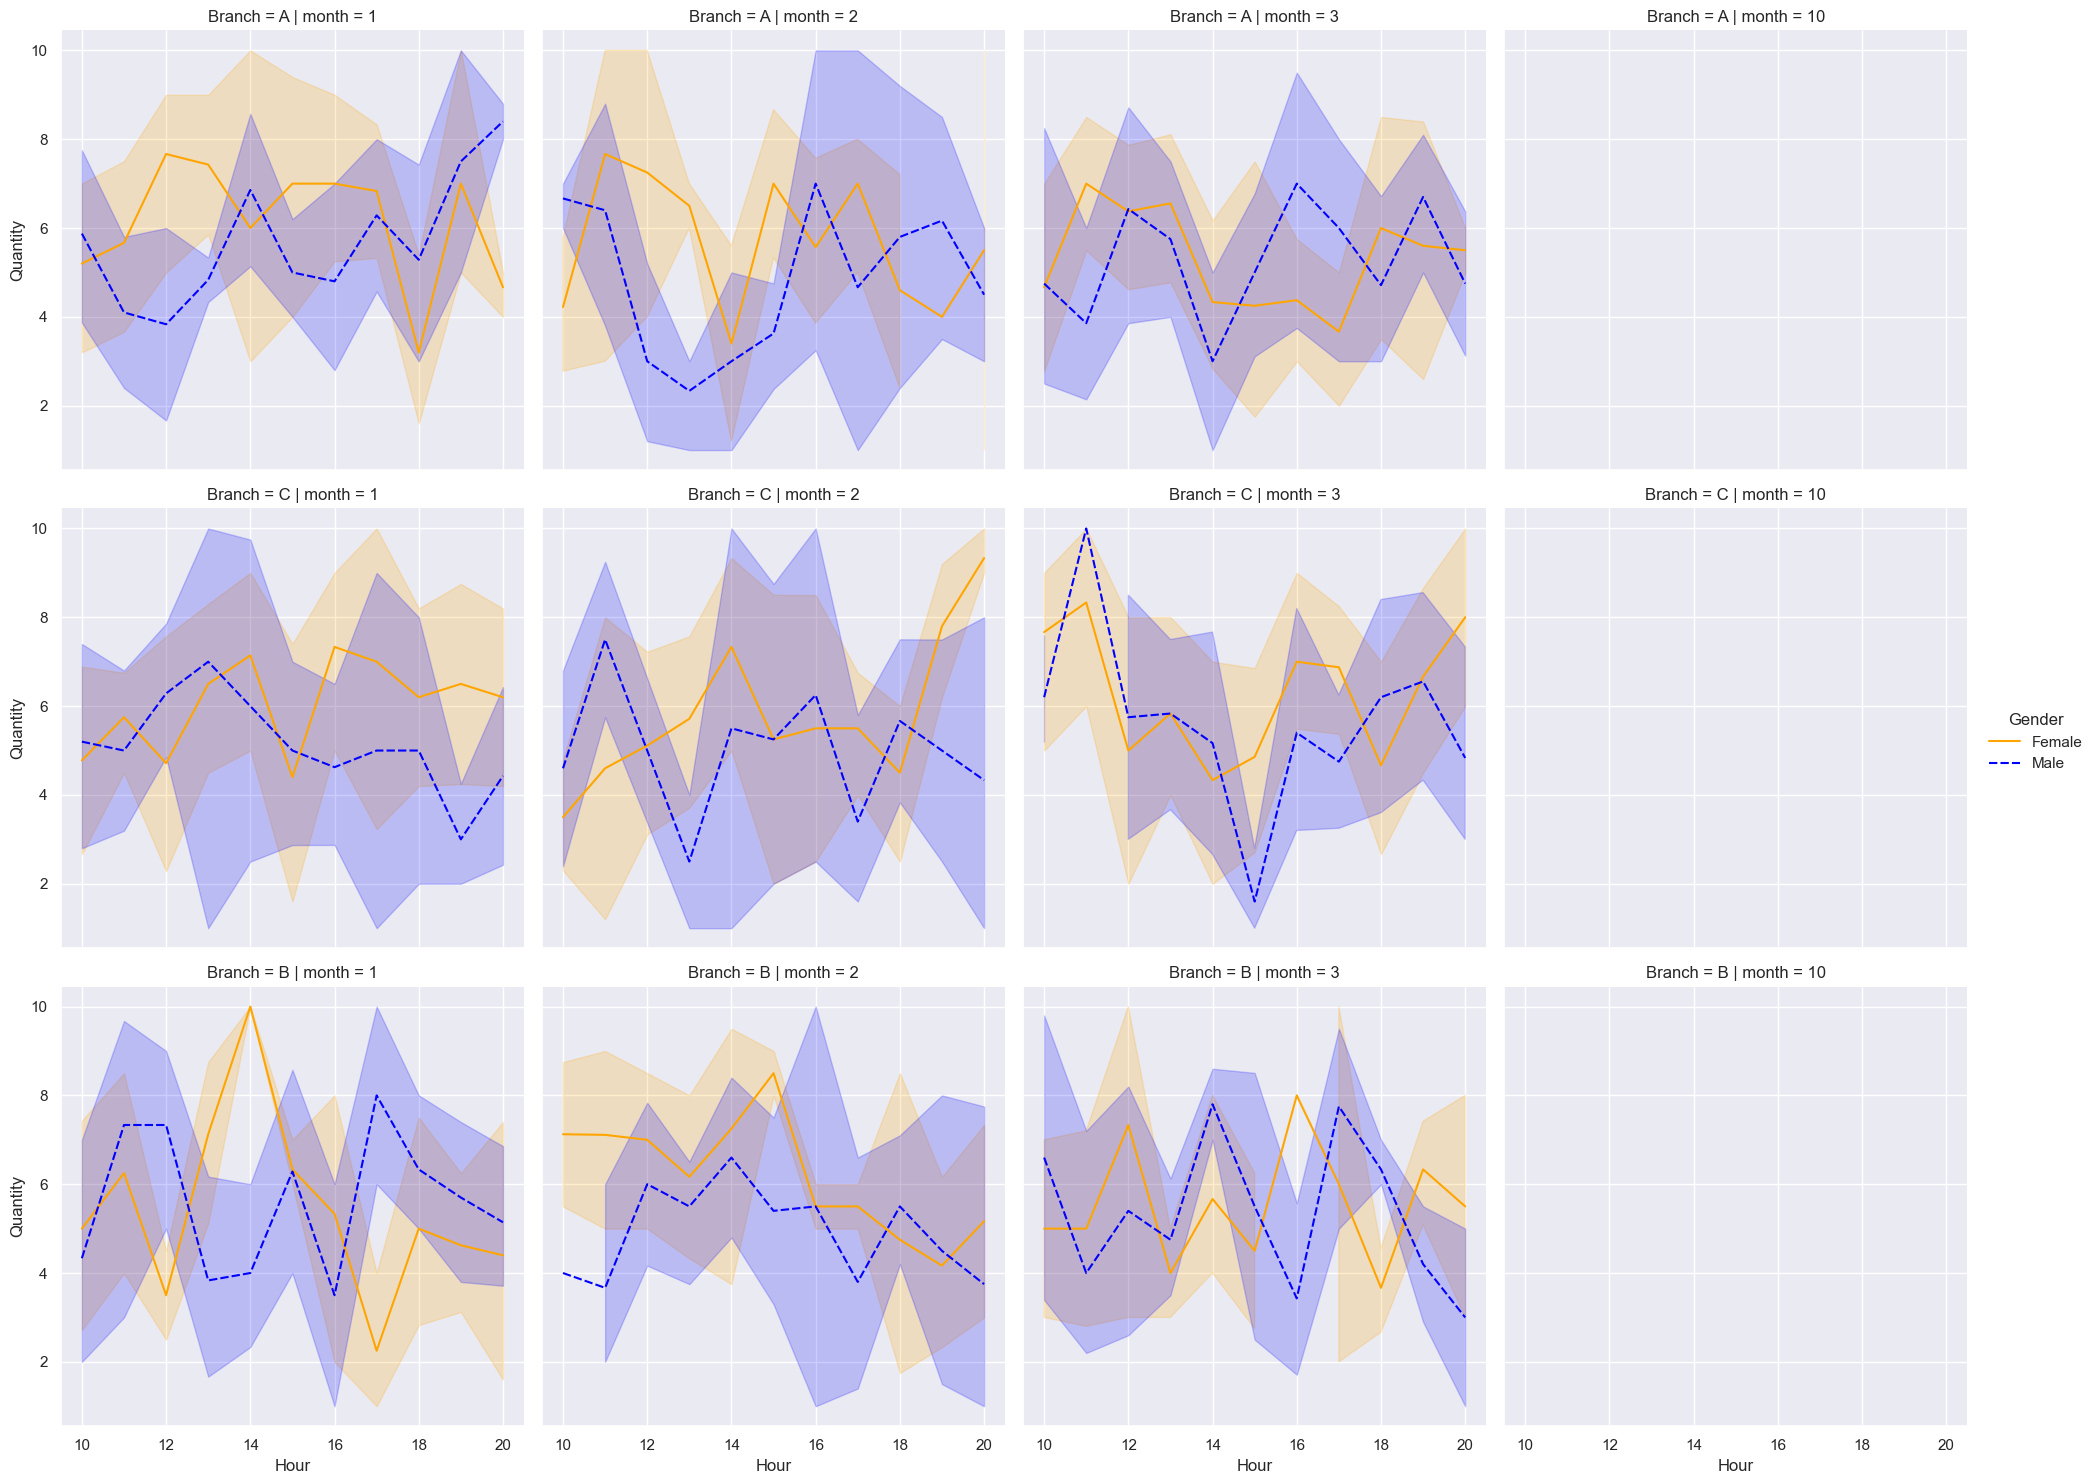

In [68]:
sales_hours = sns.relplot(x="Hour", y="Quantity", col="month", row="Branch", kind="line", hue="Gender", style="Gender", palette={"Male": "blue", "Female": "orange"}, data=sales)

In [69]:
sales_hours

In [70]:
sales['Rating'].unique()    # shows the unique rating

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

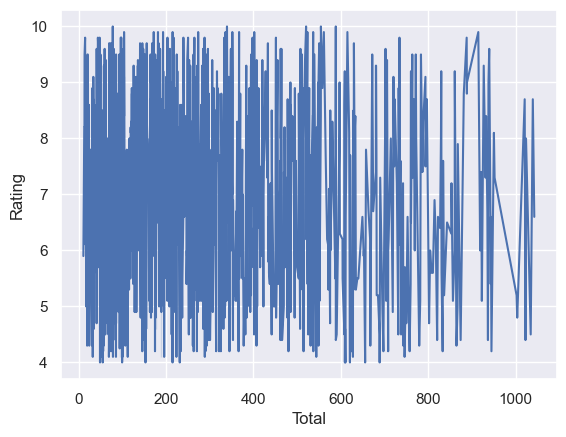

In [71]:
ageDisSpend = sns.lineplot(x = "Total", y = "Rating", data = sales)

# Product Analysis

Lets look at the various product performance


<Axes: xlabel='Quantity', ylabel='Product line'>

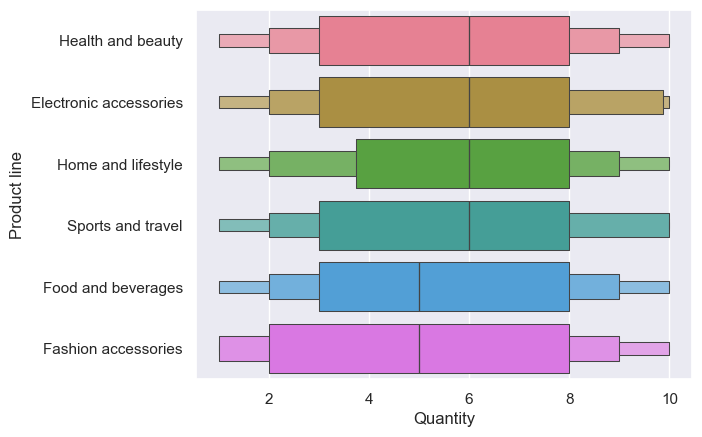

In [72]:
sns.boxenplot(y="Product line", x="Quantity", data=sales, palette="husl")

From the above visual, Health and Beauty,Electronic accessories, Homem and lifestyle, Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories.


<Axes: xlabel='count', ylabel='Product line'>

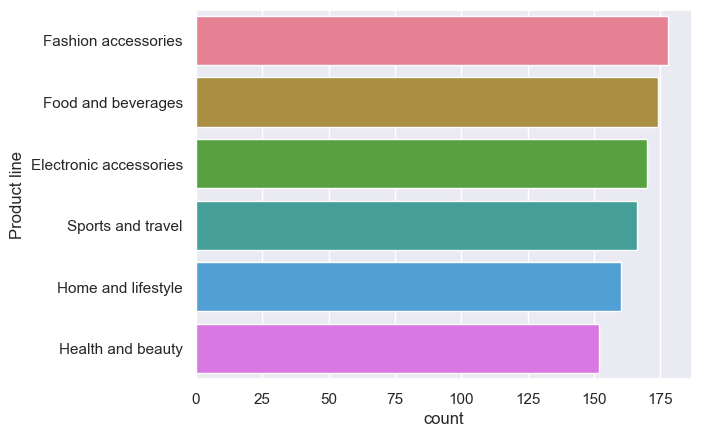

In [73]:
sns.countplot(y='Product line',  data=sales, order=sales['Product line'].value_counts().index, palette='husl')

From the above image shows the top product line item type sold in the given dataset. Fashion Accessories is the highest while Health and beauty is the lowest

<Axes: xlabel='Total', ylabel='Product line'>

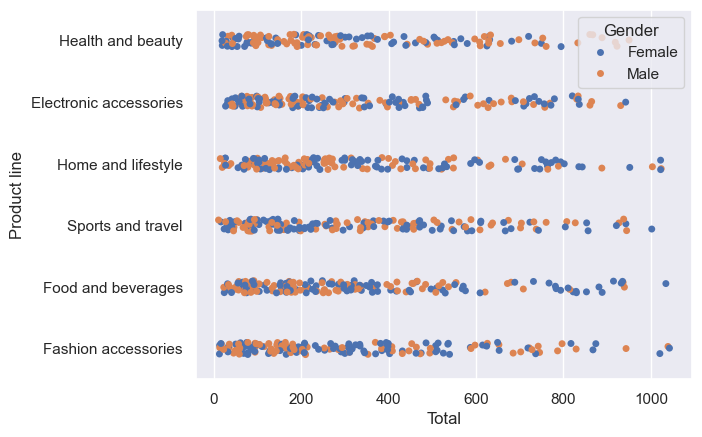

In [74]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )

The above strip plot provides a clear depiction of how the 'Total' values vary within each 'Product line' category.

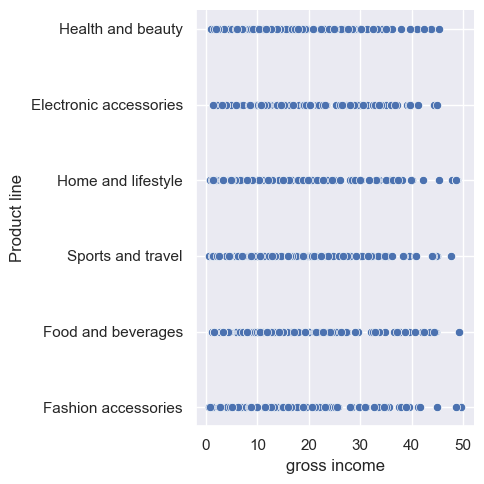

In [75]:
sns.relplot(y = 'Product line', x = 'gross income', data=sales )

<Axes: xlabel='Rating', ylabel='Product line'>

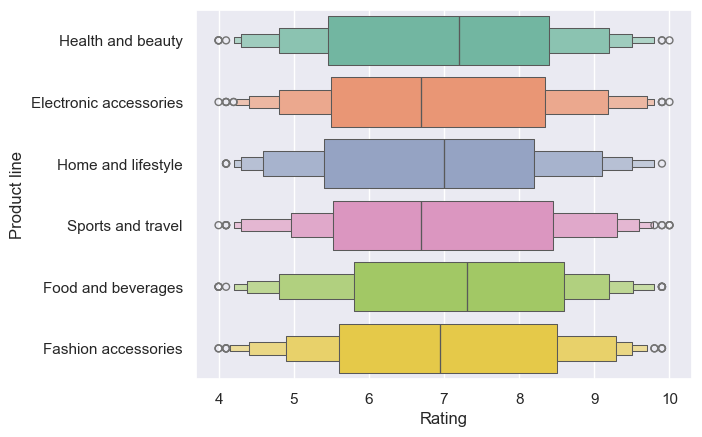

In [76]:
sns.boxenplot(y = 'Product line', x = 'Rating', data = sales, palette = "Set2")

From the above plot we can say, food and beverages havce the highiest average rating while sports and travel has the lowest.

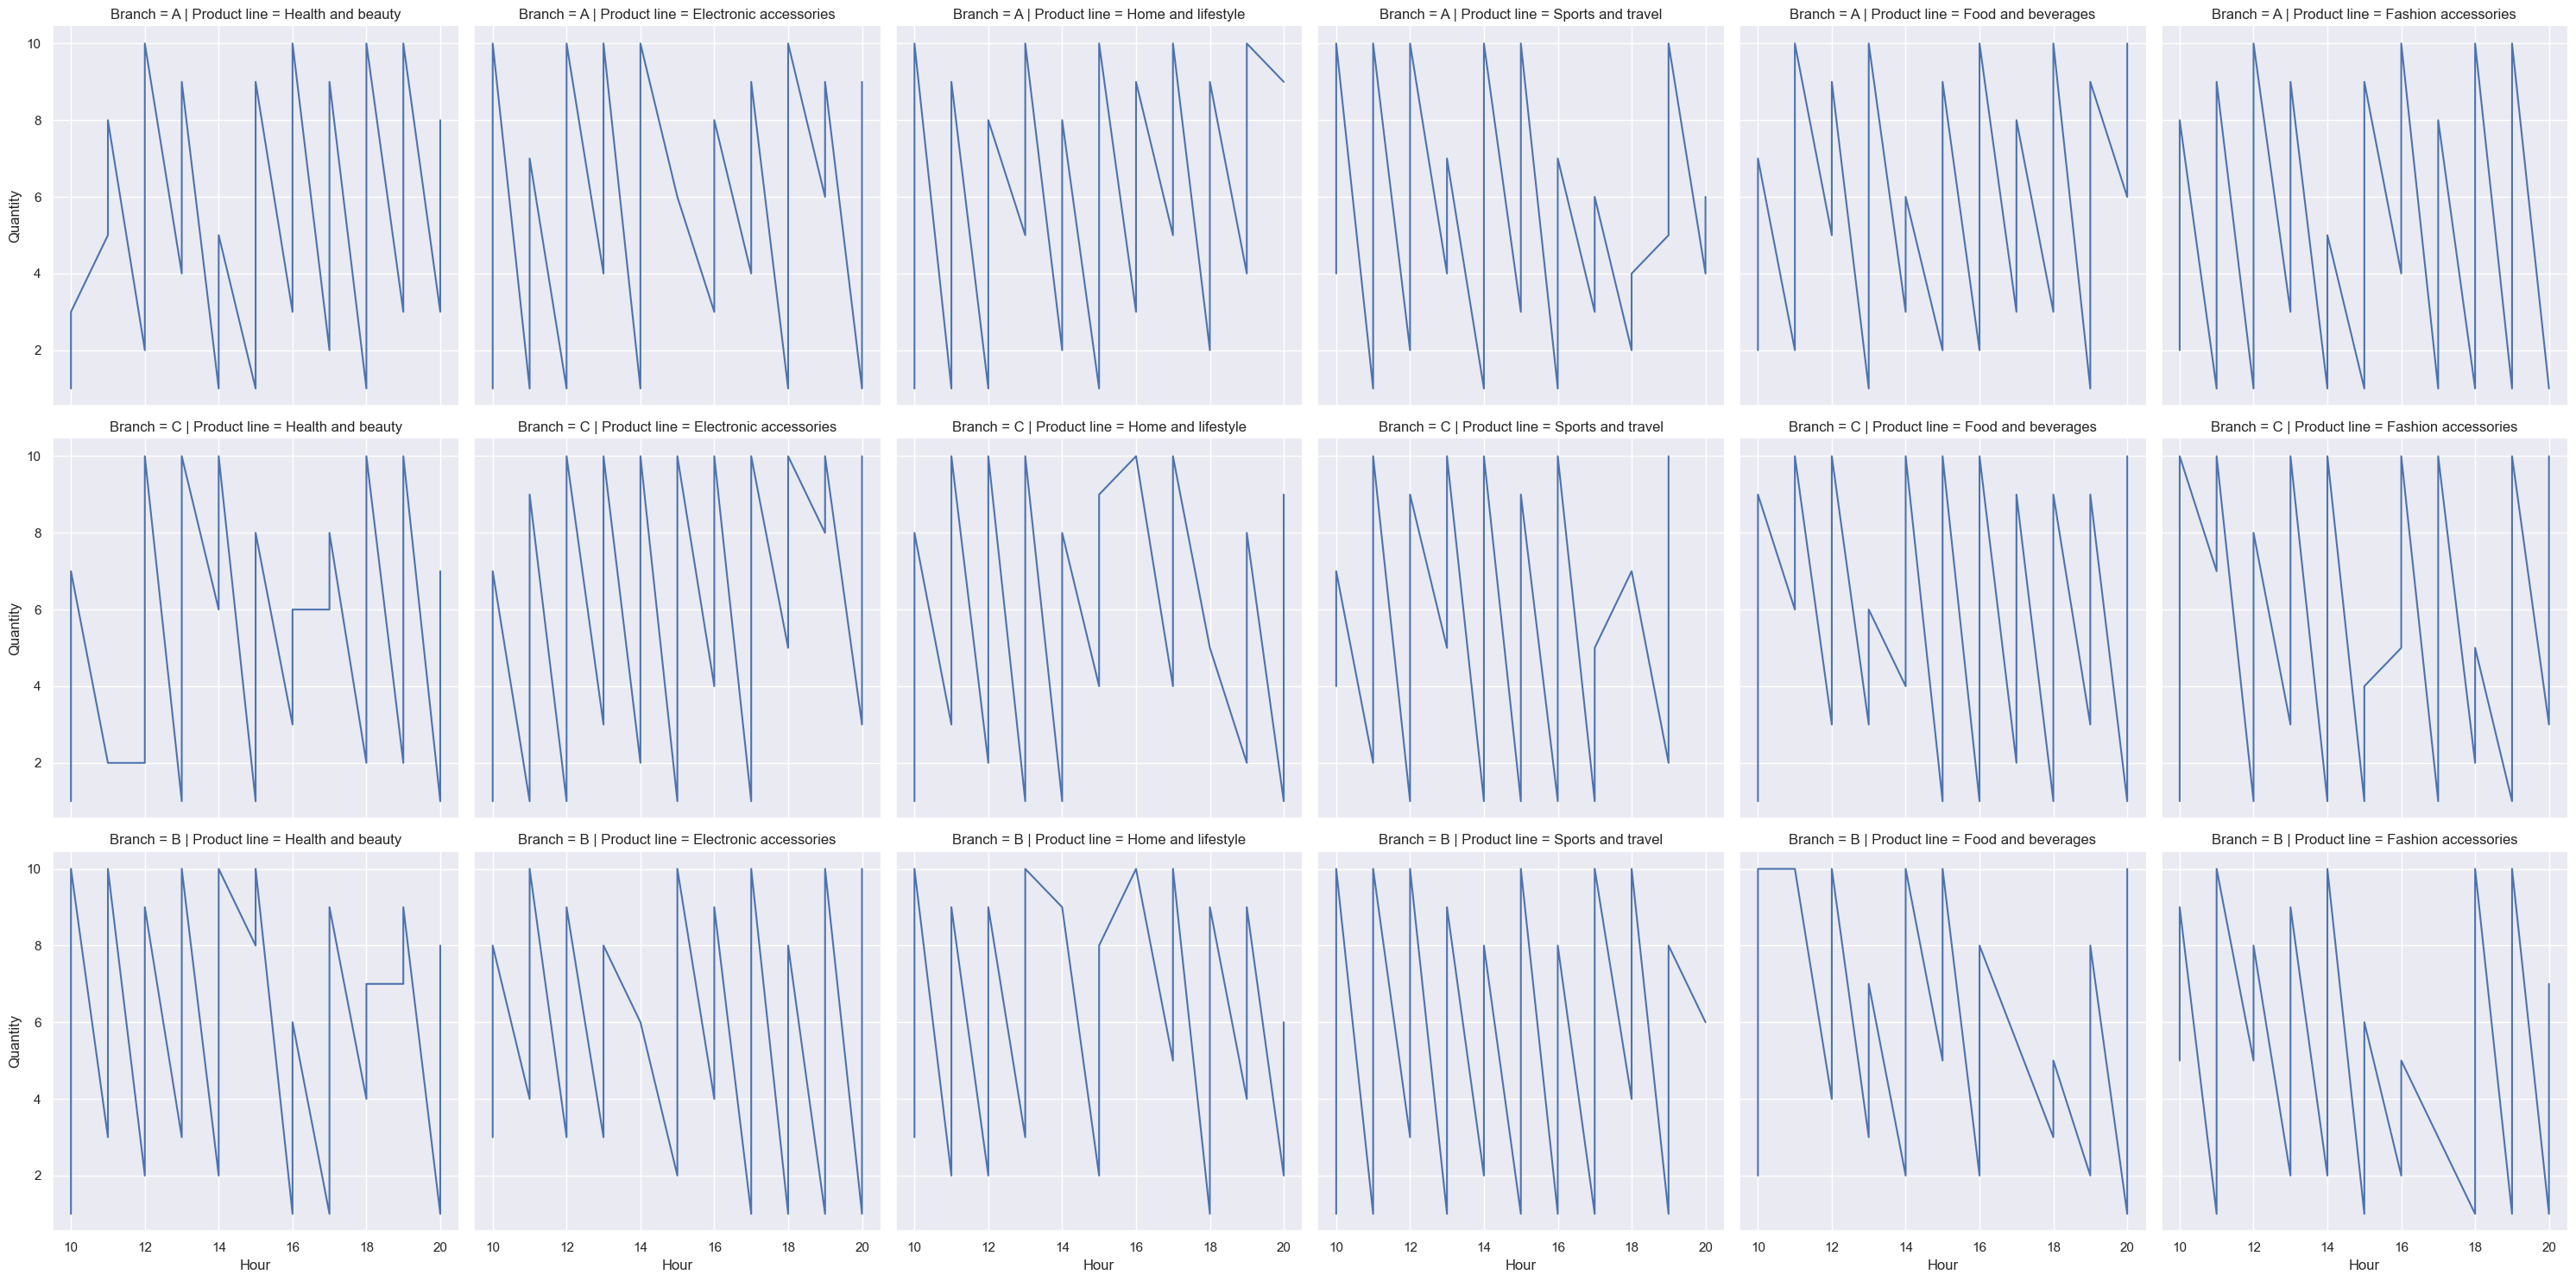

In [77]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)

From the above plots, we can see that food and beverages sales usually high in all three branches at evening especially around 19:00

# Customer Analysis

We can see that there are 2 types of customers. Members and Normal

In [80]:
sales['Customer type'].nunique()

2

sns.set(style="darkgrid")
sns.countplot(x="Customer type", data=sales, palette="Set2").set_title("Customer Type")

Text(0.5, 1.0, 'Customer Type by Branch')

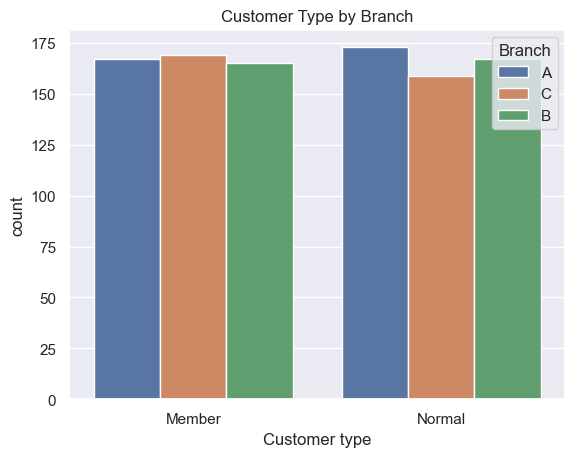

In [81]:
sns.countplot(x = "Customer type", hue = "Branch", data = sales).set_title("Customer Type by Branch")

# Business Problems

#

# 1. Does customer type influences the sales

In [84]:
sales.groupby(["Customer type"]).agg({'Total' : 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<Axes: xlabel='Customer type', ylabel='Total'>

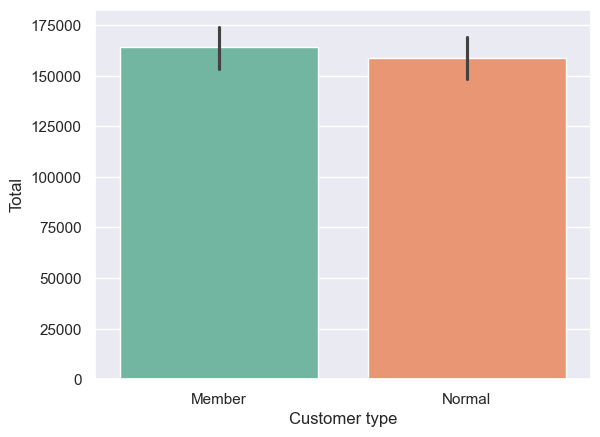

In [88]:
sns.barplot(x = "Customer type", y = "Total", estimator = sum, data = sales, palette = 'Set2')

So, yes the customer type influences the sales as we can see the normal customers spend less

# 2. What is the average rating of each product line?

Average rating of each product line:
Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


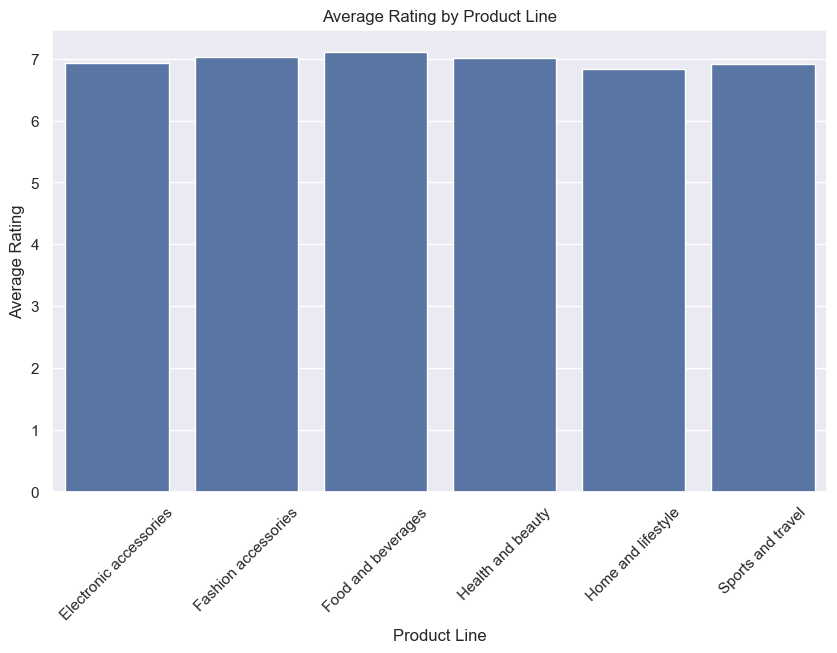

In [90]:

average_rating_per_product_line = sales.groupby('Product line')['Rating'].mean()
print("Average rating of each product line:")
print(average_rating_per_product_line)

# Visualizing average rating by product line
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_per_product_line.index, y=average_rating_per_product_line.values)
plt.title('Average Rating by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# 3. How many transactions were made using each payment method?

In [92]:
transactions_per_payment_method = sales['Payment'].value_counts()
print("Number of transactions made using each payment method:")
print(transactions_per_payment_method)

Number of transactions made using each payment method:
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


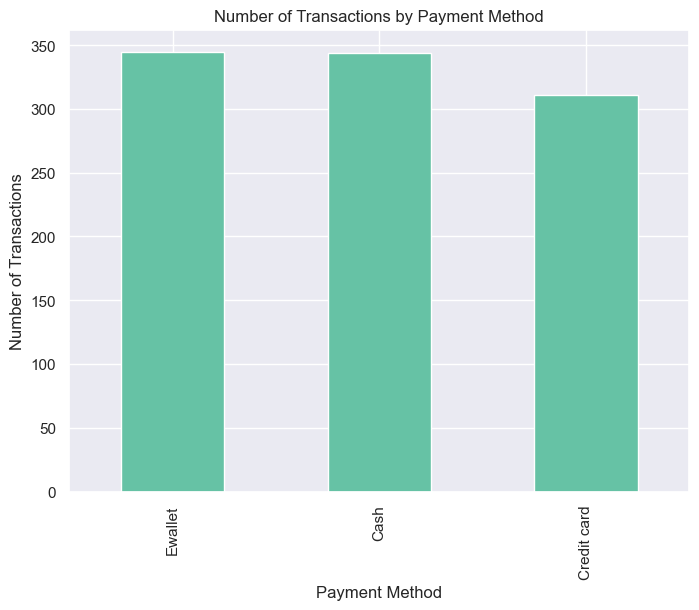

In [94]:
sns.set_palette('Set2')

# Visualizing number of transactions by payment method
plt.figure(figsize=(8, 6))
transactions_per_payment_method.plot(kind='bar')
plt.title('Number of Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

So, Ewallet is the most preferred payment method.





# 4. How many transactions were made by each customer type?

In [98]:
transactions_per_ctype = sales['Customer type'].value_counts()
print("Number of transactions made by each customer type:")
print(transactions_per_ctype)

Number of transactions made by each customer type:
Customer type
Member    501
Normal    499
Name: count, dtype: int64


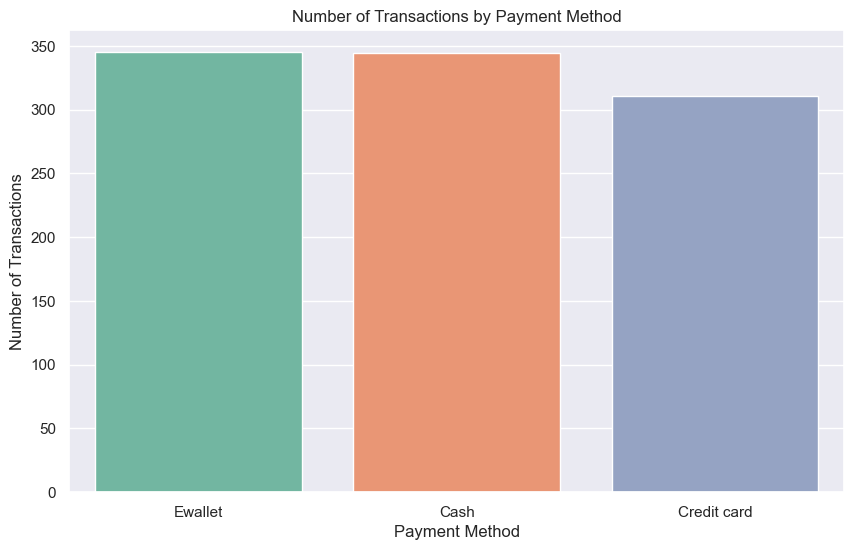

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x=transactions_per_payment_method.index, y=transactions_per_payment_method.values, palette='Set2')
plt.title('Number of Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

# 5. What is the correlation between unit price and quantity sold?

In [101]:
correlation = sales['Unit price'].corr(sales['Quantity'])
print("Correlation between unit price and quantity sold:", correlation)

Correlation between unit price and quantity sold: 0.01077756434249728
